In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The ``PhotoReceptor`` class in ``openRetina`` is a platform-indepent wrapper for grabbing frames from a webcam. We will here test its efficiency.

## Performances with different framescales

In [9]:
%%writefile test_fps.py
#! /usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import time
from openRetina import PhotoReceptor

def moyFPS(nb_trials, downscale, N_frame = 100):
    
    acc = []
    
    for i in range(nb_trials):
        start = time.time()
        
        cam = PhotoReceptor(DOWNSCALE=downscale)
        for j in range(N_frame):
            img = cam.grab()
        cam.close()

        stop = time.time()
        acc.append(N_frame/(stop-start))
    
    return np.array(acc)

def pretty_print(acc):
    return(' 🍺 FPS = {mean} +/- {std} (in frames per second)'.format(mean=acc.mean(), std=acc.std()))

if __name__ == '__main__':

    for downscale in [16, 8, 4, 2, 1]:
        print ('Downscale = %d ' % downscale)
        print (pretty_print(moyFPS(nb_trials=16, downscale=downscale, N_frame=100)))

Overwriting test_fps.py


In [ ]:
%run test_fps.py

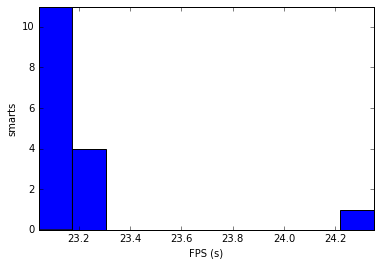

In [11]:
from test_fps import moyFPS

ctime = moyFPS(nb_trials=16, downscale=1, N_frame=100)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(ctime)
plt.xlabel('FPS (s)')
plt.ylabel('smarts')
_ = plt.axis('tight')

# git

In [2]:
!git s


 M 2016-01-07_LeCheapEyeTracker_GrabbingOneFrame.ipynb
 M 2016-01-08_LeCheapEyeTracker_Camera_statsMacOSX.ipynb
 M 2016-01-08_LeCheapEyeTracker_Camera_statsRaspberryPi.ipynb
 M test_fps.py


In [6]:
!git commit -am' 🍹 '

[master d4c37eb]  🍹
 4 files changed, 167 insertions(+), 26 deletions(-)


In [7]:
!git push

Counting objects: 8, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 2.48 KiB | 0 bytes/s, done.
Total 8 (delta 6), reused 0 (delta 0)
To https://github.com/meduz/LeCheapEyeTracker.git
   4af679e..d4c37eb  master -> master
